# Assignment 2 - Central limit theorem

Caporali Ilaria \
Scialpi Matteo

## Central limit theorem
If $N$ independent random variables $\{x_1;x_2;\dots;x_N\}$ have means $\mu_n$ and finite variances $\sigma_n^2$, then, in the limit of large $N$, the sum $\sum_nx_n$ has a distribution that tends to a normal (Gaussian) distribution with mean $\sum_n\mu_n$ and variance $\sum_n\sigma_n^2$.

## Questions
1. Two ordinary dice with faces labelled $\{1,\dots,6\}$ are thrown. What is the probability distribution of the sum of the values? What is the probability distribution of the absolute difference between the values?
2. One hundred ordinary dice are thrown. What, roughly, is the probability distribution of the sum of the values? Sketch the probability distribution and estimate its mean and standard deviation.
3. How can two cubical dice be labelled using the numbers $\{0, 1, 2, 3, 4,5, 6\}$ so that when the two dice are thrown the sum has a uniform probability distribution over the integers $1$-$12$? Plot the pdf.
4. Is there any way that one hundred dice could be labelled with integers such that the probability distribution of the sum is uniform?
5. Can you plot the probability distribution function for the cases in question 1 when the number of dice is $N_{dice} > 2$? When $N_{dice} = 2, 3, 4, 10, 20$ looks like a gaussian pdf? If not, why?
6. Can you plot the probability distribution function for the cases in question 4 when the number of dice is $N_{dice} > 2$? When $N_{dice} = 2, 3, 4, 10, 20$ looks like a gaussian pdf? If not, why?

## Question 1
For this question, we have to analyse all possible outcomes of the sum and of the absolute difference of the two random variables
\begin{gather}
    x_1="\textit{result of the 1}^{st}\textit{ dice}"\,,\\
    x_2="\textit{result of the 2}^{nd}\textit{ dice}"\,.
\end{gather}

### Outcomes' sum
As the text says, the two dice are labelled as usual, so the sum of the two variables can be obtained as in the table below.

|+||1|2|3|4|5|6|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|**1**||2|3|4|5|6|7|
|**2**||3|4|5|6|7|8|
|**3**||4|5|6|7|8|9|
|**4**||5|6|7|8|9|10|
|**5**||6|7|8|9|10|11|
|**6**||7|8|9|10|11|12|

The probability distribution can be simply represented via the calculation of the frequency $f$, so the probability for the $i$-th value of the sum $x_i$ is
\begin{equation}
    \mathcal{P}(x_i|f_i,N)=\frac{O_i}{O}=f_i
\end{equation}
where $O_i$ is the number of good outcomes and $O$ is the number of total outcomes. From the above table, we have $O=36$ and so frequencies for different values of the sum $x_{N}$ are

|$x_i$|$f_i$|
|:---:|:---:|
|2|1/36|
|3|2/36|
|4|3/36|
|5|4/36|
|6|5/36|
|7|6/36|
|8|5/36|
|9|4/36|
|10|3/36|
|11|2/36|
|12|1/36|

As we can clearly see, the probability is distributed as a triangle. \
For what concerns the mean value, in the case of a single dice throw (N=1), it is given by
\begin{equation}
\bar{x}_{N=1} = \sum_{i=1}^{6} \mathcal{P}(i|N=1)\, i\, = 3.5
\end{equation}

We can generalize to the case of N dices in the following way:
\begin{equation}
\bar{x}_{N} = \sum_{i=N}^{6N} \mathcal{P}(i|N=1)\,i\
\end{equation}

Now for two dices we will have:

\begin{equation}
\bar{x}_{N=2} = \sum_{i=2}^{12} \mathcal{P}(i|N=2)\,i\ = 7
\end{equation}

The variance can be calculated in general as
\begin{equation}
\sigma^2_{N}=\sum_{i=N}^{6N}\mathcal{P}(i|N)\,i^2-\bar{x}_{N}^2\,,
\end{equation}

Respectively for the single dice it reads $\sigma^2_{N=1}\approx2.92$ and and for the sum of the two dice $\sigma^2_{N=2}\approx5.84$ ($\approx2.42^2$).

We can see that, as expected from the central limit theorem, the mean value for the sum of two dices is the double of the single dice mean value outcome, and the same relationship holds for the variance.

### Outcomes' absolute difference
The absolute difference is instead

|-||1|2|3|4|5|6|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|**1**||0|1|2|3|4|5|
|**2**||1|0|1|2|3|4|
|**3**||2|1|0|1|2|3|
|**4**||3|2|1|0|1|2|
|**5**||4|3|2|1|0|1|
|**6**||5|4|3|2|1|0|

Here again we can use an $f$ calculation to compute probability densities for $x_{diff}$, which reads

|$x_{diff}$|$f$|
|:---:|:---:|
|0|6/36|
|1|10/36|
|2|8/36|
|3|6/36|
|4|4/36|
|5|2/36|



### Code
Here below we can find the code to see these results. In particular we decided to plot the continous triangle fit, the best one for $N=2$ and the continous Gaussian fit for comprison with next answers.



# times the simulation is reitereted : 10000
Gaussian fit: mean =  7.01 , std =  2.67
Theoretical expected values; mean = 7, std = 2.42


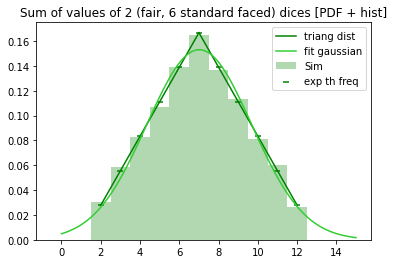

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson
from scipy.stats import nbinom
from scipy.stats import triang

random.seed(162738)

def d_outcome():
    d = random.randint(1,6)
    return d

#main

seq=[]
N = 2 #number of dices
times = 10000 # n° of times the dices are thrown in the simulation
for i in range(times):
    d1 = d_outcome()
    d2 = d_outcome()
    seq.append(d1+d2)
    
d = np.array(seq)

print('# times the simulation is reitereted :', times)

# the bins should be of integer width
bins = np.arange(15) - 0.5
entries, bin_edges, patches = plt.hist(d, bins=bins, density=True, label='Sim', facecolor='g', alpha=0.3)

def tri_pdf():
  x_up = np.linspace(2,7, 100)
  x_down = np.linspace(7,12, 100)
  m = 1/36
  q1 = -1/36
  q2 = 13/36
  y_up = m*x_up + q1
  y_down = -m*x_down + q2
  return x_up, y_up, x_down, y_down

x_up, y_up, x_down, y_down = tri_pdf()

plt.plot(x_up, y_up, color='green', label='triang dist')
plt.plot(x_down, y_down, color='green')

# calculate bin centres
bin_middles = 0.5 * (bin_edges[1:] + bin_edges[:-1])

def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt, pcov = curve_fit(gauss_function, bin_middles, entries, p0 = [1, 7, 2.67])
var=popt[2]**2.
print('Gaussian fit: mean = ', "{:.2f}".format(popt[1]), ', std = ', "{:.2f}".format(popt[2]))
print('Theoretical expected values; mean = 7, std = 2.42')
x = np.linspace(0,15, 100)
plt.plot(x, gauss_function(x, *popt), color='limegreen' ,label='fit gaussian' )

sum_val = np.linspace(2, 12, 11)
freq = [1/36, 1/18, 1/12, 1/9, 5/36, 1/6, 5/36, 1/9, 1/12, 1/18, 1/36]
plt.scatter(sum_val, freq, color='green', marker='_', label='exp th freq' )

plt.title('Sum of values of 2 (fair, 6 standard faced) dices [PDF + hist]')
plt.legend()
plt.show()





#### Absolute difference

# times the simulation is reitereted : 100000


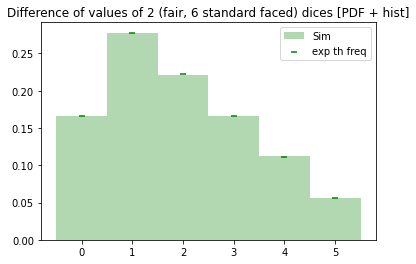

In [ ]:
random.seed(162738)

#main

seq=[]
N = 2 #number of dices
times=100000
print('# times the simulation is reitereted :', times)
for i in range(times):
    d1 = d_outcome()
    d2 = d_outcome()
    seq.append(np.absolute(d1-d2))
    
d = np.array(seq)

# the bins should be of integer width
bins = np.arange(7) - 0.5
entries, bin_edges, patches = plt.hist(d, bins=bins, density=True, label='Sim', facecolor='g', alpha=0.3)

# calculate bin centres
bin_middles = 0.5 * (bin_edges[1:] + bin_edges[:-1])

sum_val = np.linspace(0, 5, 6)
freq = [1/6, 5/18, 2/9, 1/6, 1/9, 1/18]
plt.scatter(sum_val, freq, color='green', marker='_', label='exp th freq' )

plt.title('Difference of values of 2 (fair, 6 standard faced) dices [PDF + hist]')
plt.legend()
plt.show()



## Question 2
For this case a table for results is unpractical because it should have 100 dimensions. Anyway, we can simulate the throw of 100 dice that will display a gaussian behaviour.

# times the simulation is reitereted : 100000


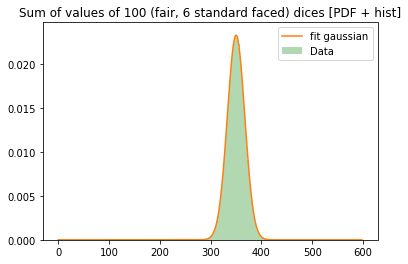

In [ ]:
random.seed(333)

#main

seq=[]
N = 100 #number of dices
times=100000
print('# times the simulation is reitereted :', times)
for i in range(times):
    d = 0
    for j in range(N):
        d_n = d_outcome()
        d = d + d_n
    seq.append(d)
    #print(d)
    
d = np.array(seq)

# the bins should be of integer width, because poisson is an integer distribution
bins = np.arange(600) - 0.5
entries, bin_edges, patches = plt.hist(d, bins=bins, label='Data', facecolor='g', alpha=0.3, density=True)

# calculate bin centres
bin_middles = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# fit with curve_fit for gaussian

def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt, pcov = curve_fit(gauss_function, bin_middles, entries, p0 = [1, 350, 20])

plt.plot(bin_middles, gauss_function(bin_middles, *popt), zorder=3, label='fit gaussian' )
plt.title('Sum of values of 100 (fair, 6 standard faced) dices [PDF + hist]')
plt.legend()
plt.show()



As we can clearly see, the pdf for $x_{N}$ values fits perfectly with a Gaussian distribution. This is consistent with the central limit theorem and is based on the fact that the characteristic function associated to the residuals tends to a Gaussian with zero mean and unitary variance for $N\rightarrow\infty$. This means that $x_{N}$ tends to a normal distribution with mean given by $N\bar{x}_n$ and variance given by $N\sigma^2_n$ (This motivation is taken from Loreti statistics' book: https://www.roma1.infn.it/people/luci/chimica/MLoreti-statistica.pdf). Theoretically, we expect from the center limit theorem the expectation value
\begin{equation}
\bar{x}=\sum_n\bar{x}_n=N\bar{x}_n=100\,\bar{x}_n=350\,,
\end{equation}
while for the variance we expect
\begin{equation}
\sigma^2=\sum_{n}\sigma^2_n=N\sigma^2_n=100\sigma^2_n=292\,.\qquad(\approx17,09^2)
\end{equation}
Here below we can find the mean and the standard deviation derived from the fitted Gaussian function.

In [ ]:
print('Gaussian fit: mean = ', "{:.2f}".format(popt[1]), ', std = ', "{:.2f}".format(popt[2]))

Gaussian fit: mean =  350.10 , std =  17.14


## Question 3

As we saw in the answer to question 1, we have a number $O=36$ of possible combinations, while possible values of the sum $x_{N=2}$ can span from $1$ to $12$. To have a uniform distribution of $x_{N=2}$, we want the same frequency for every possible value, that will necessarely be given by
\begin{equation}
\frac{1}{f}=\frac{O}{\text{# }x_{N=2}}=\frac{36}{12}=3\,.
\end{equation}
This means that every possible outcome must have a frequency $f=1/3$. This can only have one solution, that is to "lock" one of the two single dice probability densities at its extreme. In other words, a dice can be labeled as usual, while the other must have three faces labeled with a 0 and three faces labeled with a 6, to obtain that each value of the sum from 1 to 12 is displayed 3 times in a table like the following

|+||0|0|0|6|6|6|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|**1**||1|1|1|7|7|7|
|**2**||2|2|2|8|8|8|
|**3**||3|3|3|9|9|9|
|**4**||4|4|4|10|10|10|
|**5**||5|5|5|11|11|11|
|**6**||6|6|6|12|12|12|

Here below we can find the code that throws these two dice and the plot of the final pdf for $x_{N=2}$.

# times the simulation is reitereted : 10000


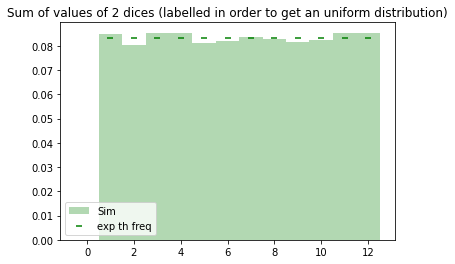

In [ ]:
def d_outcome_relabeled():
  d = random.randint(0,1)
  if d == 1:
    d = 6*d
  return d

#main

seq=[]

times=10000
print('# times the simulation is reitereted :', times)
for i in range(times):
    d1 = d_outcome()
    d2 = d_outcome_relabeled()
    seq.append(d1+d2)

d = np.array(seq)

# the bins should be of integer width
bins = np.arange(14) - 0.5
entries, bin_edges, patches = plt.hist(d, bins=bins, density=True, label='Sim', facecolor='g', alpha=0.3)

# calculate bin centres
bin_middles = 0.5 * (bin_edges[1:] + bin_edges[:-1])


sum_val = np.linspace(1, 12, 12)
freq = [1/12, 1/12, 1/12, 1/12, 1/12, 1/12, 1/12, 1/12, 1/12, 1/12, 1/12, 1/12 ]
plt.scatter(sum_val, freq, color='green', marker='_', label='exp th freq' )

plt.title('Sum of values of 2 dices (labelled in order to get an uniform distribution)')
plt.legend()
plt.show()

##Question 4

Extending the previous formula to the general case, it reads
\begin{equation}
\frac{1}{f}=\frac{O}{\text{# }x_N}=\frac{6^N}{6N}\,.
\end{equation}
For N=100 this is really unpractical to work with because one particular number needs to appear $\approx1.09\cdot10^{75}$ times. \
Anyway, another thing that can be done is to make one particular outcome of the sum $x_N$ to appear only once. This implies the following set of labels for the $r$-th dice:
\begin{equation}
\{0,1,2,3,4,5\}\times6^r\,.
\end{equation}
The probability distribution for every possible $x_N$'s outcome is then simply given by $f=1/6^{N}$.

Here below we can find a code that throws 10 dice labelled as we just said (the 100 dice code results in an overflow in the $6^{100}$ calculation) and plots the final probability distribution for the sum $x_{N=10}$.

# times the simulation is reitereted : 10000


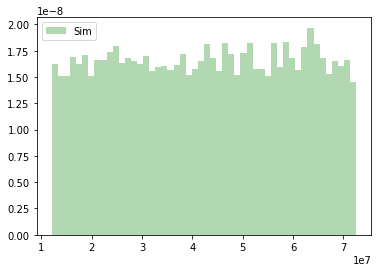

In [ ]:
#main

seq=[]
times=10000
print('# times the simulation is reitereted :', times)
N = 10      #number of dice
for i in range(times):
    d = 0
    for j in range(N):
        d_n = d_outcome()*(6**j)
        d = d + d_n
    seq.append(d)
    #print(d)
    
d = np.array(seq)

plt.hist(d, bins= 50, density=True, facecolor='g', alpha=0.3, label='Sim')
plt.legend()
plt.show()

## Question 5

For this question, we can look at the answer to the question 2. While $N$ grows, the distribution tends to look more like a Gaussian with $N\bar{x}_{N=1}$ mean and $N\sigma^2_{N=1}$ variance, as pointed out by the central limit theorem.

 
# times the simulation is reitereted : 10000
Gaussian fit: mean =  10.52 , std =  3.15


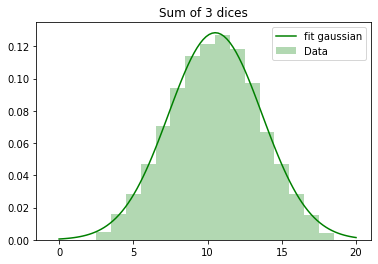

 
# times the simulation is reitereted : 10000
Gaussian fit: mean =  14.07 , std =  3.54


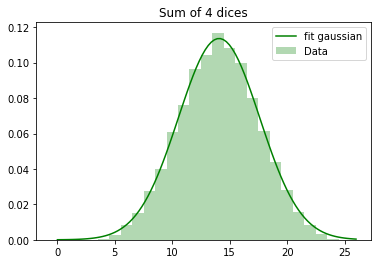

 
# times the simulation is reitereted : 10000
Gaussian fit: mean =  35.02 , std =  5.48


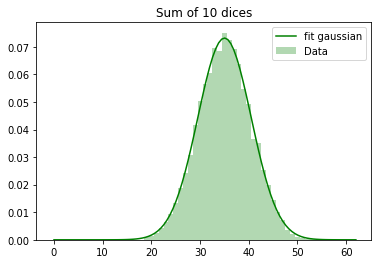

 
# times the simulation is reitereted : 10000
Gaussian fit: mean =  70.10 , std =  7.66


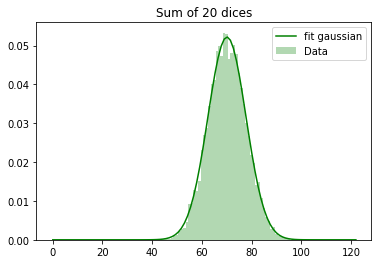

In [ ]:
def sum_dices(N, times):
  fig = plt.figure()
  seq=[]
  print(' ')
  print('# times the simulation is reitereted :', times)
  for i in range(times):
    d = 0
    for j in range(N):
        d_n = d_outcome()
        d = d + d_n
    seq.append(d)
    #print(d)
    
  d = np.array(seq)

  # the bins should be of integer width, because poisson is an integer distribution
  bins = np.arange(N*6+2) - 0.5
  entries, bin_edges, patches = plt.hist(d, bins=bins, label='Data', facecolor='g', alpha=0.3, density=True)

  # calculate bin centres
  bin_middles = 0.5 * (bin_edges[1:] + bin_edges[:-1])

  # fit with curve_fit for gaussian
  def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

  x = np.linspace(0,6*N+2, 100)
  popt, pcov = curve_fit(gauss_function, bin_middles, entries,  p0 = [1, 3.5*N, 2] )
  print('Gaussian fit: mean = ', "{:.2f}".format(popt[1]), ', std = ', "{:.2f}".format(popt[2]))
  plt.plot(x, gauss_function(x, *popt), zorder=3, label='fit gaussian', color='green' )
  plt.title('Sum of ' +str(N)+' dices')
  plt.legend()
  plt.show()

  return fig

#main

times = 10000

f3 = sum_dices(3, times)
f4 = sum_dices(4, times)
f10 = sum_dices(10, times)
f20 = sum_dices(20, times)

## Question 6

As we said in question 4, the $r$-th dice is labelled as
\begin{equation}
\{0,1,2,3,4,5\}\times6^r\,,
\end{equation}
to lead by construction to $f=1/6^N$. In this case the labels were constructed "ad hoc" to lead to a uniform sum distribution. \
The uniform result we can see below, despite the high value of N, isn't in contrast with the central limit theorem because this constraint on labels, done to build a peculiar probability distribution, makes different $\{x_1,x_2,\dots,x_N\}$ variables not really independent within each other.

 
# times the simulation is reitereted : 10000


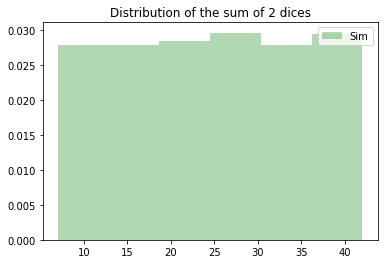

 
# times the simulation is reitereted : 10000


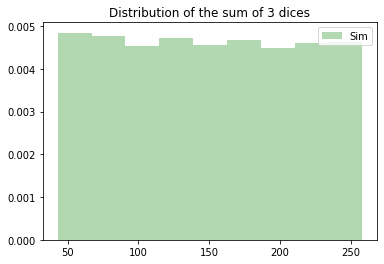

 
# times the simulation is reitereted : 10000


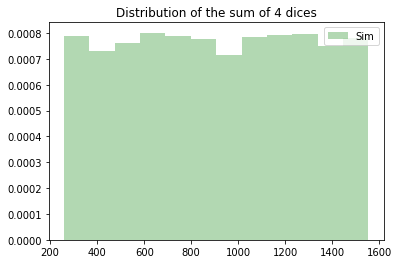

 
# times the simulation is reitereted : 10000


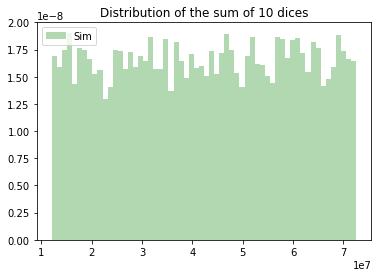

Warning **!** : Simulations considering a number of dices greater than 10 show an overflow in their numerical computation.


In [ ]:
def sum_uni_dices(N, times, b):
  seq=[]
  fig = plt.figure()
  print(' ')
  print('# times the simulation is reitereted :', times)
  for i in range(times):
    d = 0
    for j in range(N):
      d_n = d_outcome()*(6**j)
      d = d + d_n
    seq.append(d)
    
  d = np.array(seq)

  plt.hist(d, bins=b, density=True, facecolor='g', alpha=0.3, label='Sim')
  plt.title('Distribution of the sum of ' +str(N)+' dices')
  plt.legend()
  plt.show()
  return fig

#main
times=10000
f2 = sum_uni_dices(2, times, 6)
f3 = sum_uni_dices(3, times,  9)
f4 = sum_uni_dices(4, times, 12)
f10 = sum_uni_dices(10, times, 60)

print('Warning **!** : Simulations considering a number of dices greater than 10 show an overflow in their numerical computation.')